In [1]:
import cost_functions as cf
import utils
from graph import Graph

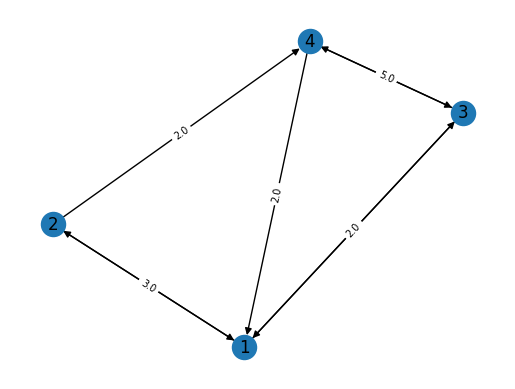

In [2]:
with open("graph", "r") as file:
    graph = Graph.read(file)
graph.plot()

In [3]:
encoding_type = cf.EncodingType.OneHot
n_paths = 1
max_path_length = graph.n_vertices

In [4]:
generator = cf.PathFindingQUBOGenerator(cf.MinimisePathLength([0]),
                                                encoding_type,
                                                graph,
                                                n_paths,
                                                max_path_length
    )

In [5]:
generator.add_constraint(cf.PathIsValid([0]))
generator.add_constraint(cf.PathIsLoop())
generator.add_constraint(cf.PathContainsVerticesExactlyOnce(graph.all_vertices))

In [6]:
generator.construct()

Addition(order=3, left=Addition(order=3, left=Addition(order=3, left=SumFromTo(order=3, expression=SumFromTo(order=3, expression=SumFromTo(order=3, expression=Multiplication(order=2, left=Multiplication(order=2, left=Variable(order=0, name='A', subscripts=[Variable(order=0, name='v', subscripts=[], superscripts=[]), Variable(order=0, name='w', subscripts=[], superscripts=[])], superscripts=[]), right=Variable(order=0, name='x', subscripts=[Variable(order=0, name='v', subscripts=[], superscripts=[]), Variable(order=0, name='i', subscripts=[], superscripts=[])], superscripts=[])), right=Variable(order=0, name='x', subscripts=[Variable(order=0, name='w', subscripts=[], superscripts=[]), Addition(order=3, left=Variable(order=0, name='i', subscripts=[], superscripts=[]), right=Constant(order=0, value=1.0))], superscripts=[])), variable=Variable(order=0, name='w', subscripts=[], superscripts=[]), from_value=Constant(order=0, value=1), to_value=Constant(order=0, value=4)), variable=Variable(o

In [7]:
generator.construct_expansion()

Addition(order=3, left=Multiplication(order=2, left=Multiplication(order=2, left=Constant(order=0, value=4.0), right=Variable(order=0, name='x', subscripts=[Constant(order=0, value=1), Constant(order=0, value=1)], superscripts=[])), right=Variable(order=0, name='x', subscripts=[Constant(order=0, value=2), Constant(order=0, value=2.0)], superscripts=[])), right=Addition(order=3, left=Multiplication(order=2, left=Multiplication(order=2, left=Constant(order=0, value=2.0), right=Variable(order=0, name='x', subscripts=[Constant(order=0, value=1), Constant(order=0, value=1)], superscripts=[])), right=Variable(order=0, name='x', subscripts=[Constant(order=0, value=3), Constant(order=0, value=2.0)], superscripts=[])), right=Addition(order=3, left=Multiplication(order=2, left=Multiplication(order=2, left=Constant(order=0, value=3.0), right=Variable(order=0, name='x', subscripts=[Constant(order=0, value=2), Constant(order=0, value=1)], superscripts=[])), right=Variable(order=0, name='x', subscri

In [8]:
A = generator.construct_qubo_matrix()

    
utils.print_matrix(A)

<IPython.core.display.Math object>

In [9]:
(best_test, best_score) = utils.optimise_classically(A)
        
print(best_score, best_test)
    

0.0%
0.03814697265625%
0.0762939453125%
0.11444091796875%
0.152587890625%
0.19073486328125%
0.2288818359375%
0.26702880859375%
0.30517578125%
0.34332275390625%
0.3814697265625%
0.41961669921875%
0.457763671875%
0.49591064453125%
0.5340576171875%
0.57220458984375%
0.6103515625%
0.64849853515625%
0.6866455078125%
0.72479248046875%
0.762939453125%
0.80108642578125%
0.8392333984375%
0.87738037109375%
0.91552734375%
0.95367431640625%
0.9918212890625%
1.02996826171875%
1.068115234375%
1.10626220703125%
1.1444091796875%
1.18255615234375%
1.220703125%
1.25885009765625%
1.2969970703125%
1.33514404296875%
1.373291015625%
1.41143798828125%
1.4495849609375%
1.48773193359375%
1.52587890625%
1.56402587890625%
1.6021728515625%
1.64031982421875%
1.678466796875%
1.71661376953125%
1.7547607421875%
1.79290771484375%
1.8310546875%
1.86920166015625%
1.9073486328125%
1.94549560546875%
1.983642578125%
2.02178955078125%
2.0599365234375%
2.09808349609375%
2.13623046875%
2.17437744140625%
2.2125244140625%
2.250

In [10]:
generator.decode_bit_array(best_test)

[2, 4, 3, 1]